In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction Using Machine Learning2/ diabetes.csv")
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome
0    500
1    268
Name: count, dtype: int64


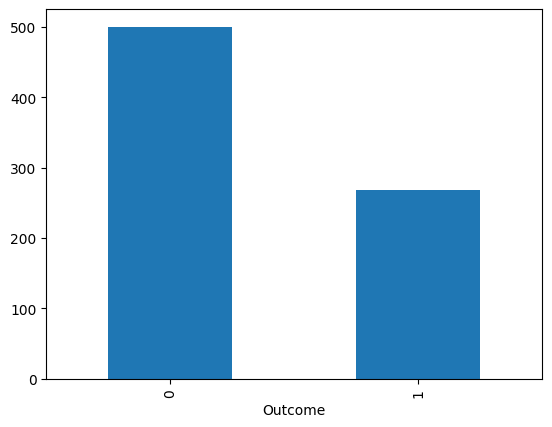

In [ ]:
color_wheel = {1:"#0392cf",2:"#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x+1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")


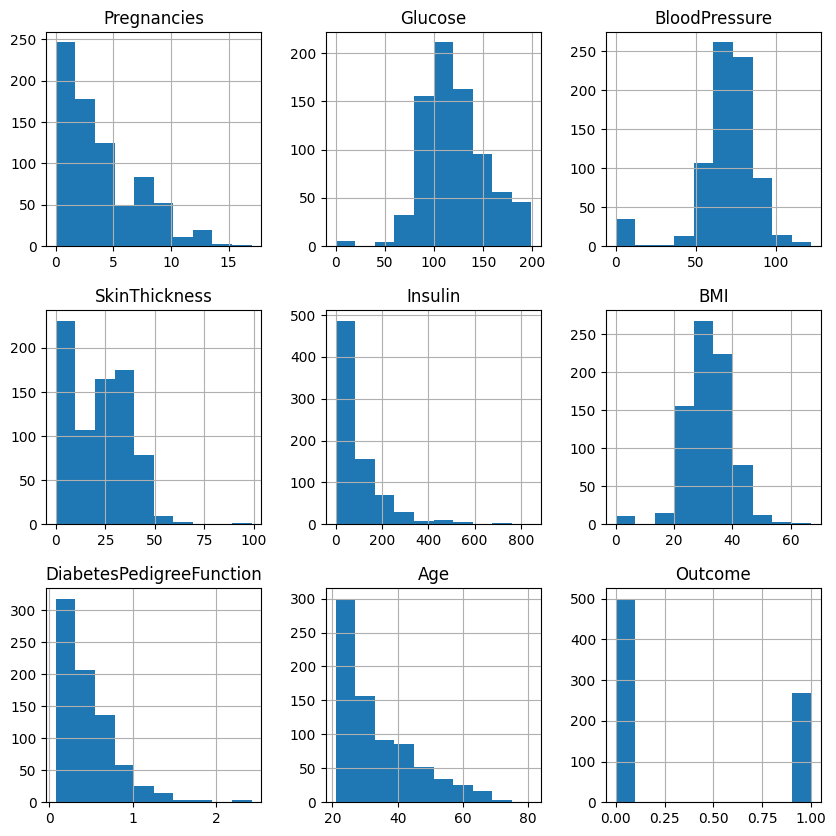

In [ ]:
p=df.hist(figsize=(10,10))

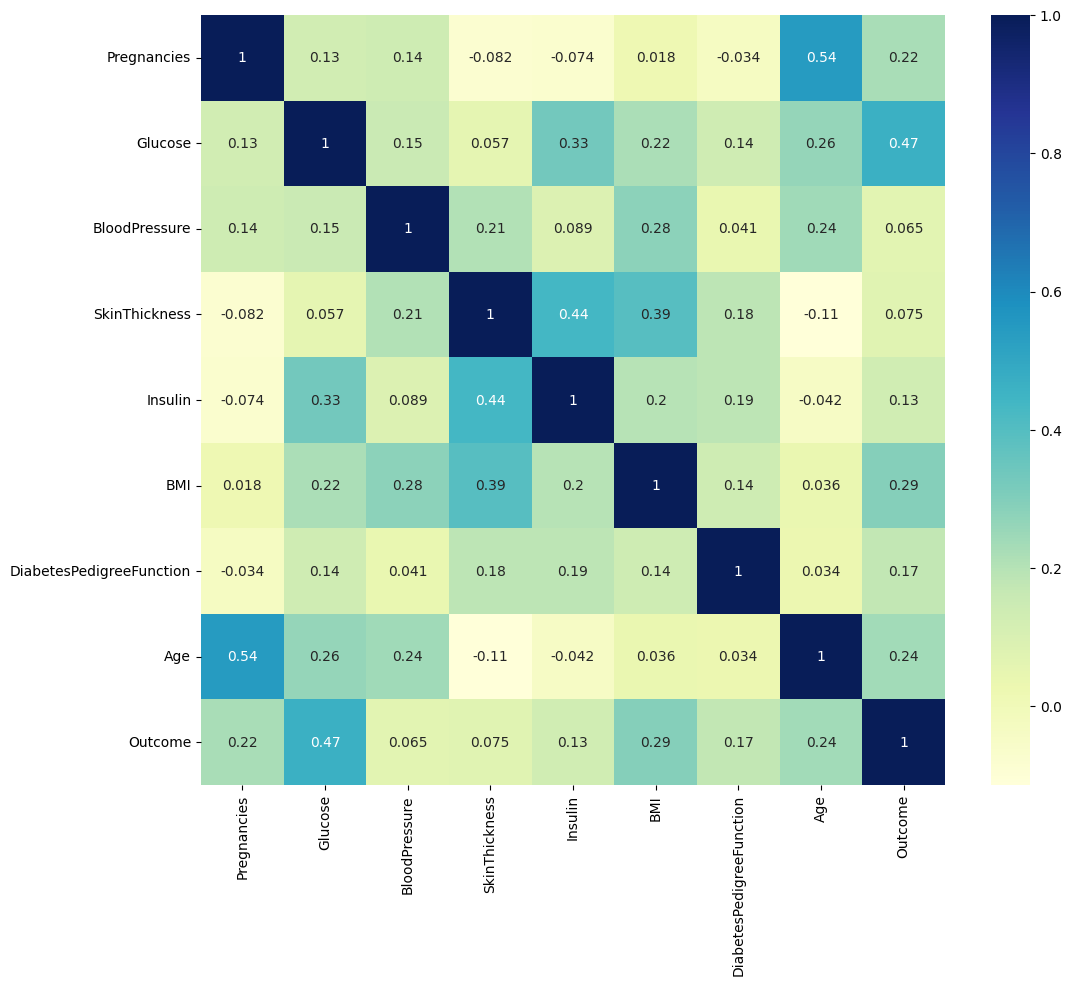

In [ ]:
#Correlstion between all the features after cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(),annot=True,cmap="YlGnBu")


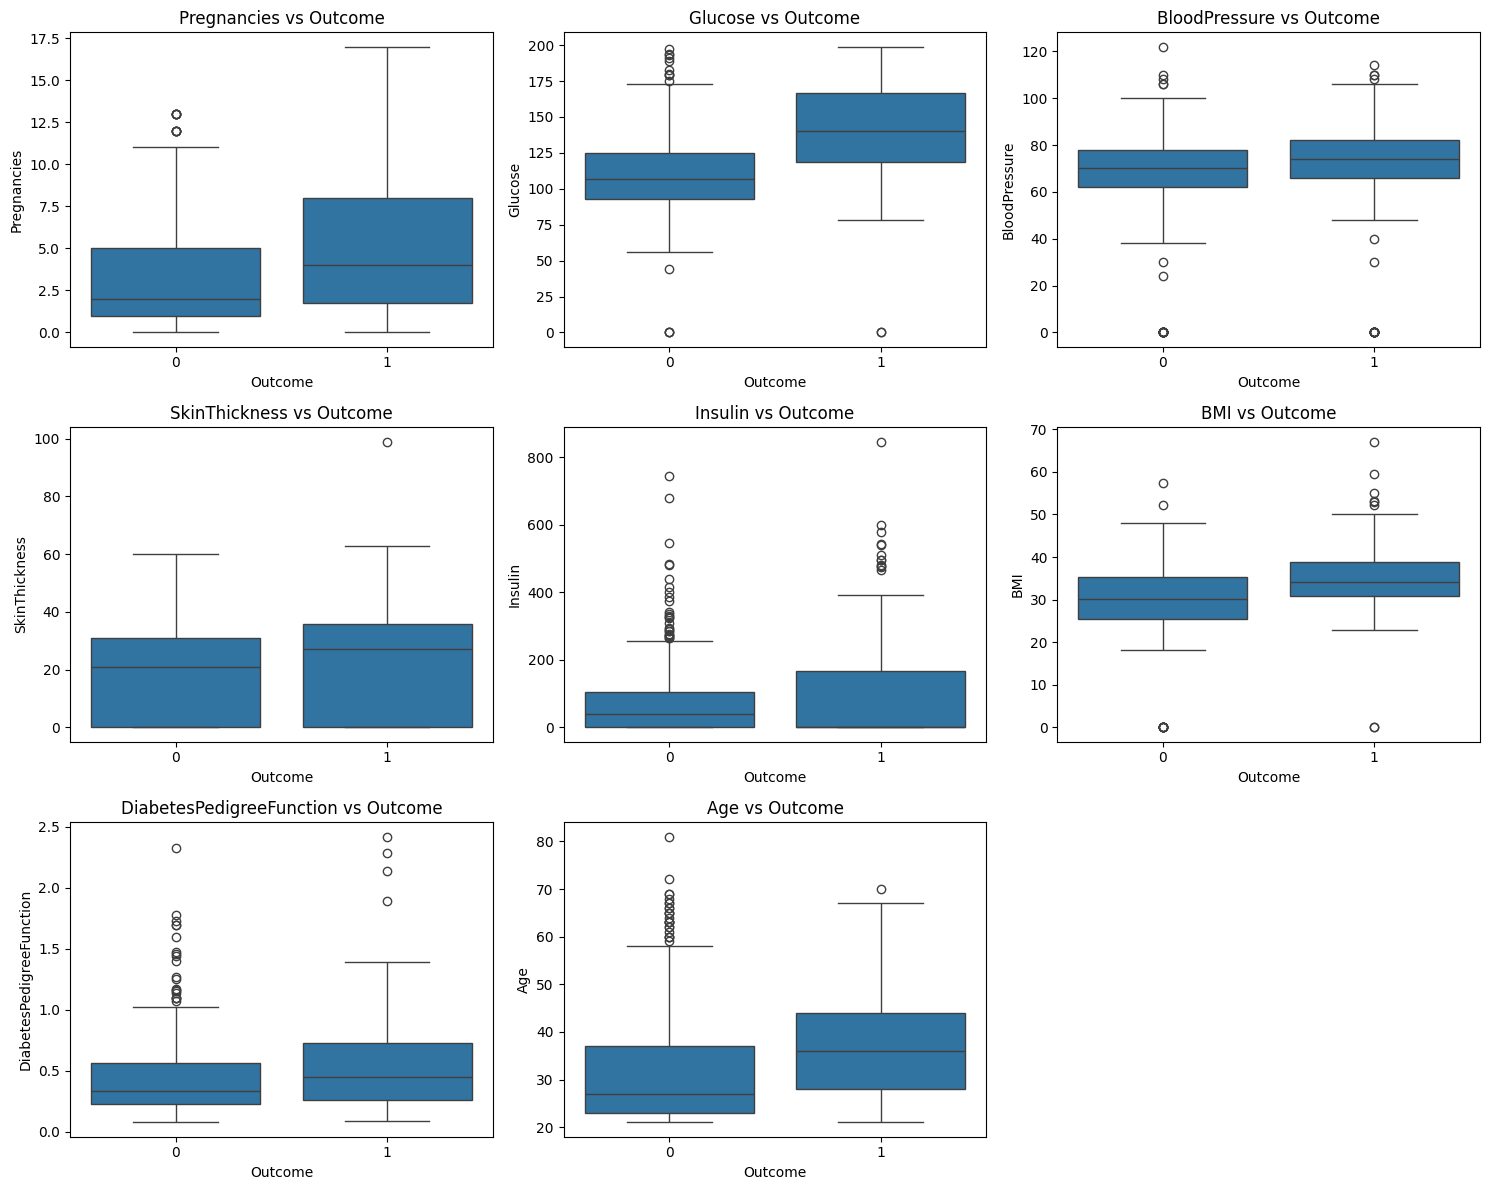

In [ ]:
features = df.columns[:-1]

# Grid আকারে প্লট
plt.figure(figsize=(15, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} vs Outcome")

plt.tight_layout()
plt.show()

**NULL VALU**

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


**NUN VALU REPLACE MEDIAN METHOD**

In [ ]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Zero মানকে NaN এ রূপান্তর
for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)

# Median দিয়ে পূরণ
for col in cols_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


/tmp/ipython-input-3350260209.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


**1  Logistic Regression - Feature Selection (Filter Method),Data Partition (Hold-out Method)**

 Best Features : ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
 Best Parameters: {'C': 10, 'solver': 'liblinear'}
 Accuracy: 0.7727272727272727

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



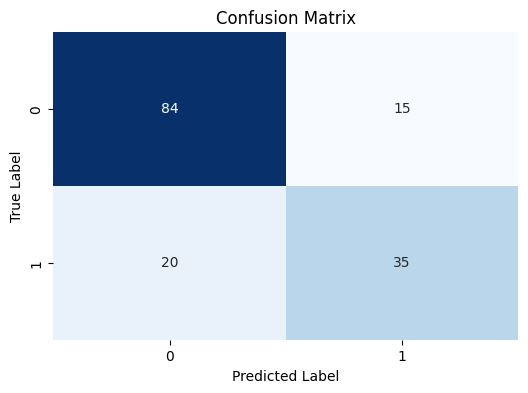

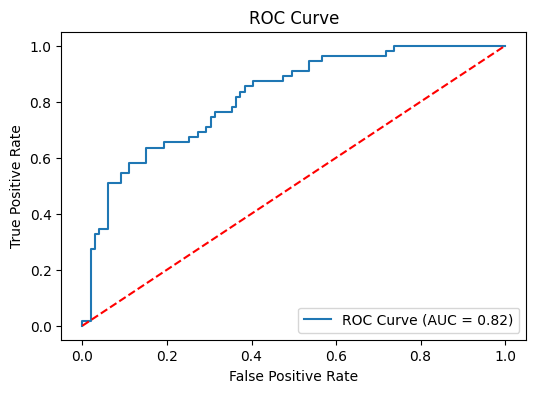

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, roc_curve, auc)


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection = Filter Method
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(" Best Features :", selected_features.tolist())

# Data Partition = Hold-out Method
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

# Hyperparameter Tuning → Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Model performance
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


**2 Logistic Regression - Feature Selection (Filter Method),Data Partition (K-fold Cross Validations)**

Best parameters: {'feature_selection__k': 10, 'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1'}
 accuracy: 0.7721

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


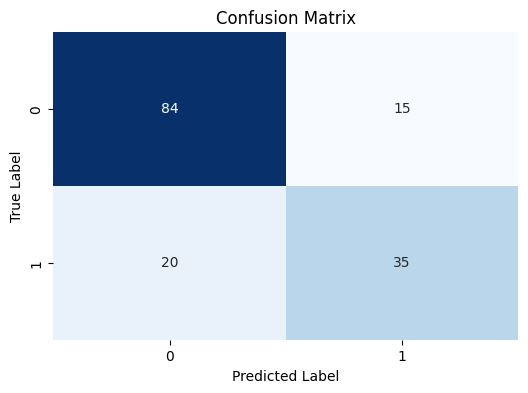

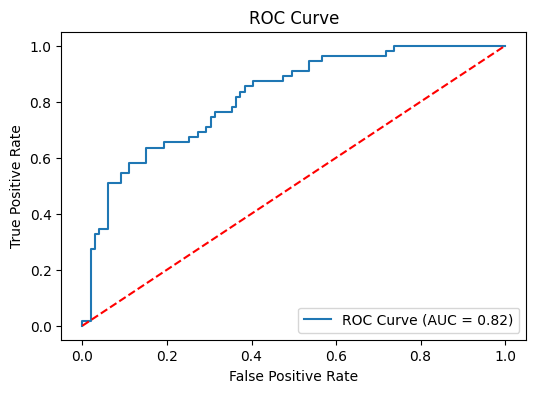

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#  1 Feature Selection using filter method (SelectKBest with chi2)
feature_selector = SelectKBest(score_func=chi2)

# 2 Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Create a pipeline with feature selection + logistic regression
pipeline = Pipeline([
    ('feature_selection', feature_selector),
    ('logistic_regression', logreg)
])

# 3 hyperparameter grid
param_grid = {
    'feature_selection__k': [5, 10, 15, 20],
    'logistic_regression__C': [0.01, 0.1, 1, 10, 100],
    'logistic_regression__penalty': ['l1', 'l2'],
}

#  4 K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 5 Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Train the model and find the best parameters
grid_search.fit(X, y)

# Best parameters and best accuracy
print("Best parameters:", grid_search.best_params_)
print(" accuracy: {:.4f}".format(grid_search.best_score_))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

**3 Logistic Regression - Feature Selection (Filter Method),Data Partition (Stratified K-fold Cross Validations)**

Accuracy (CV): 0.7882
Best Parameters: {'model__C': 100, 'model__solver': 'lbfgs', 'select__k': 10}

Test Set Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


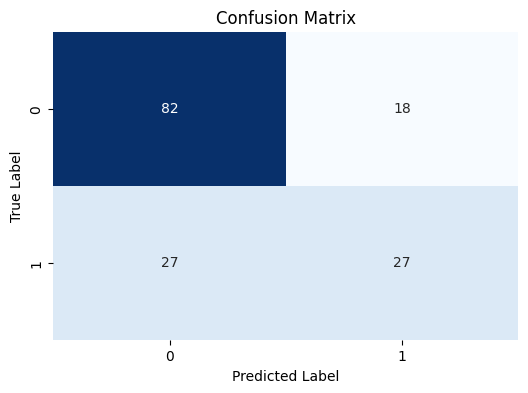

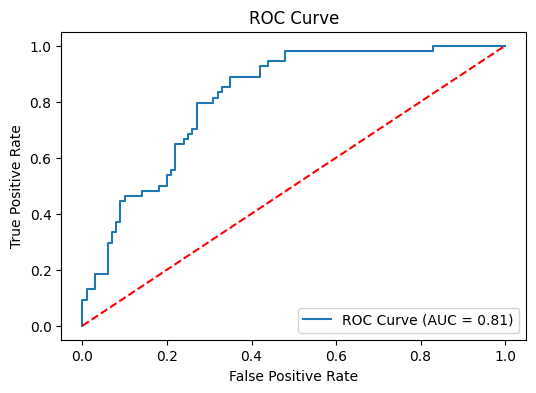

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Hold-out test set (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('select', SelectKBest(score_func=chi2)),
    ('model', LogisticRegression(max_iter=500))
])

# Hyperparameter tuning
param_grid = {
    'select__k': [5, 10, 15, 20],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Train
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Accuracy (CV): {:.4f}".format(grid.best_score_))
print("Best Parameters:", grid.best_params_)

# Predictions on hold-out test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

#  Evaluation
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


**4 Logistic Regression - Feature Selection (Filter Method),Data Partition (Leave -one out cross Validations )**

Best Parameters: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'select__k': 10}
CV Accuracy (LOO): 0.7915

Test Set Accuracy: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


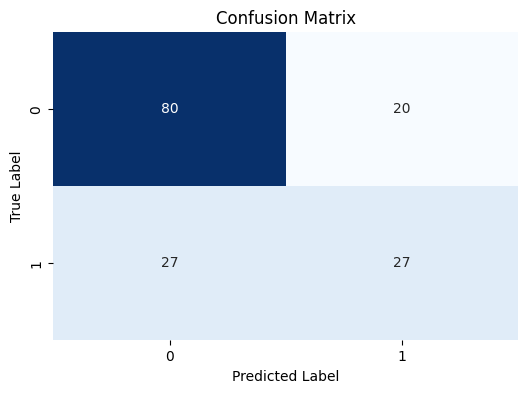

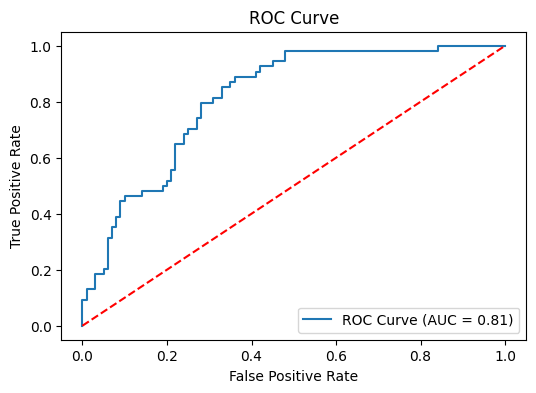

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)

#  Data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split into hold-out test set for final evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('select', SelectKBest(score_func=chi2)),
    ('model', LogisticRegression(max_iter=500))
])

# Grid Search Parameters
param_grid = {
    'select__k': [5, 10, 15, 20],
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

# Leave-One-Out CV for grid search
loo = LeaveOneOut()

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=loo,
    scoring='accuracy',
    n_jobs=-1
)

# Train on training set
grid.fit(X_train, y_train)

# Best Model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("CV Accuracy (LOO): {:.4f}".format(grid.best_score_))

# Predictions on hold-out test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


**5 Logistic Regression - Feature Selection (wrapper),Data Partition (Hold Out Method )**

নির্বাচিত ফিচার (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2', 'feature_selection__n_features_to_select': 5}
Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80       100
           1       0.62      0.78      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154



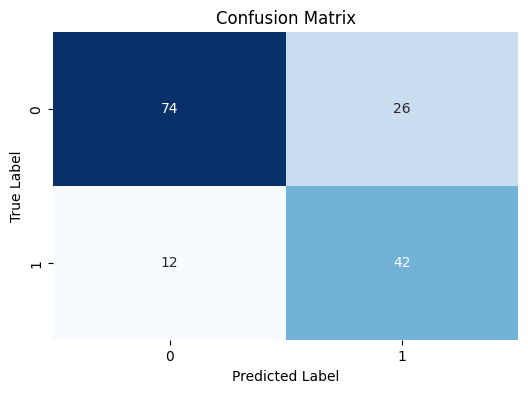

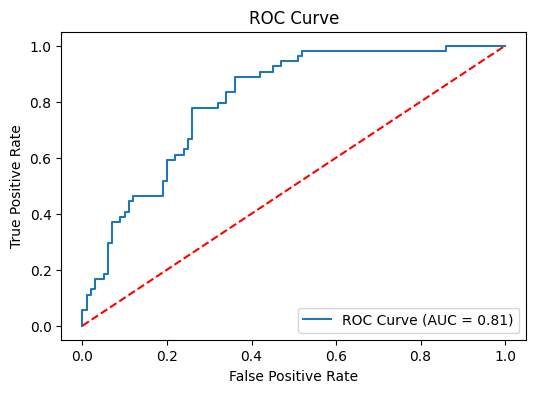

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Hold-out method
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model define (log_reg)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# RFE feature selection
rfe = RFE(log_reg, n_features_to_select=6)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("নির্বাচিত ফিচার (RFE):", selected_features.tolist())

# Pipeline with RFE

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('feature_selection', RFE(log_reg)),
    ('clf', log_reg)
])

# Grid Search parameters
param_grid = {
    'feature_selection__n_features_to_select': [5, 6, 7, 8],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


**6 Logistic Regression - Feature Selection (wrapper),Data Partition (k-Fold cross-validation )**

নির্বাচিত ফিচার (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l1', 'rfe__n_features_to_select': 15}
Best Accuracy: 0.7604617604617604

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       500
           1       0.65      0.73      0.69       268

    accuracy                           0.77       768
   macro avg       0.75      0.76      0.75       768
weighted avg       0.78      0.77      0.77       768



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=15 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


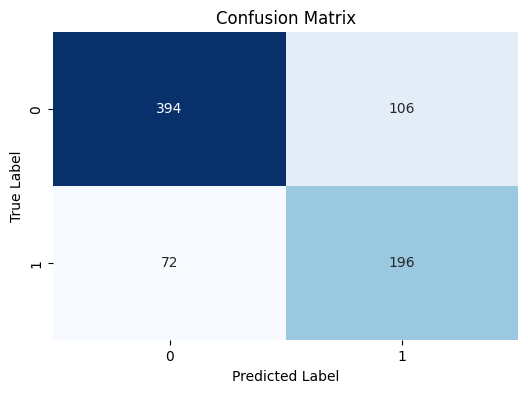

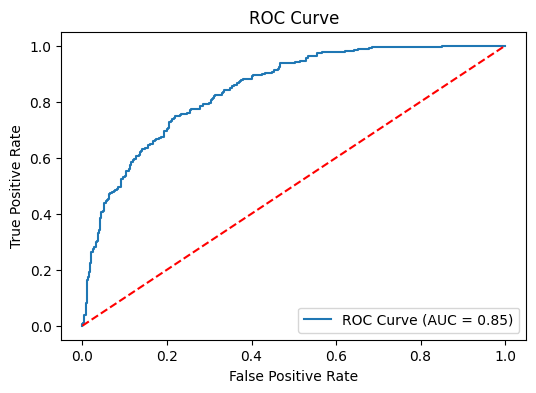

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Logistic Regression with class balance
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# RFE feature selection (initial fit to show selected features)
rfe = RFE(log_reg, n_features_to_select=6)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("নির্বাচিত ফিচার (RFE):", selected_features.tolist())

# Pipeline Setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=log_reg)),
    ('logreg', log_reg)
])

#  Hyperparameter Grid
param_grid = {
    'rfe__n_features_to_select': [5, 10, 15],
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

#  K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

#  Results
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

#  Classification Report
best_model = grid.best_estimator_
y_pred = best_model.predict(X)

print("\nClassification Report:")
print(classification_report(y, y_pred))


# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = best_model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


**7 Logistic Regression - Feature Selection (wrapper),Data Partition (Stratified k-Fold cross-validation )**

নির্বাচিত ফিচার (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Best Parameters: {'lr__C': 0.01, 'lr__penalty': 'l2', 'rfe__n_features_to_select': 5}
Best Accuracy (CV): 0.778584160937102

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       500
           1       0.71      0.61      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



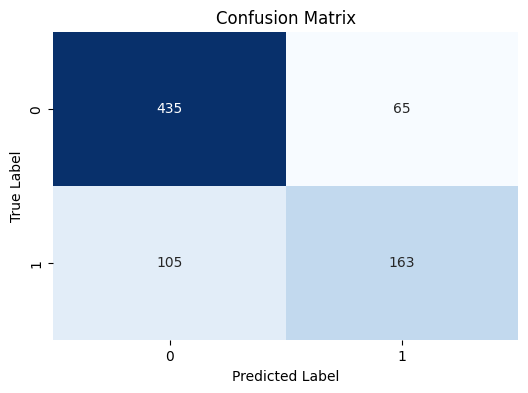

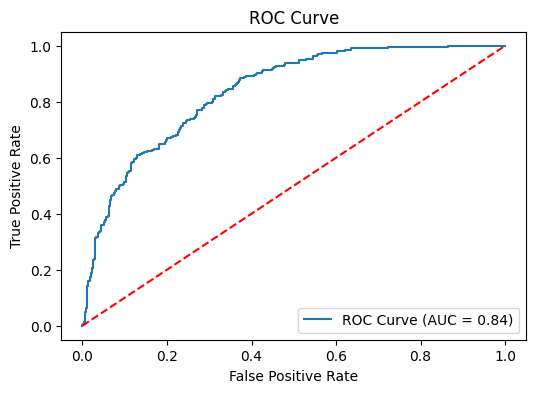

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Logistic Regression model for RFE
lr = LogisticRegression(max_iter=500, solver='liblinear')
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# Initial RFE run to see selected features
rfe = RFE(log_reg, n_features_to_select=6)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("নির্বাচিত ফিচার (RFE):", selected_features.tolist())

# Pipeline: Scaling → Feature Selection (RFE) → Logistic Regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(log_reg)),
    ('lr', lr)
])

# Hyperparameter tuning
param_grid = {
    'rfe__n_features_to_select': [5, 10, 15],
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy (CV):", grid.best_score_)

# Cross-validated predictions
y_pred = cross_val_predict(grid.best_estimator_, X, y, cv=cv)

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

# Cross-validated predicted probabilities
y_pred_prob = cross_val_predict(grid.best_estimator_, X, y, cv=cv, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')  #
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

**8 Logistic Regression - Feature Selection (wrapper),Data Partition (Leave one out cross validation)**

নির্বাচিত ফিচার (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l1', 'rfe__n_features_to_select': 5}
Best Accuracy: 0.7591

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       500
           1       0.64      0.72      0.67       268

    accuracy                           0.76       768
   macro avg       0.74      0.75      0.74       768
weighted avg       0.77      0.76      0.76       768



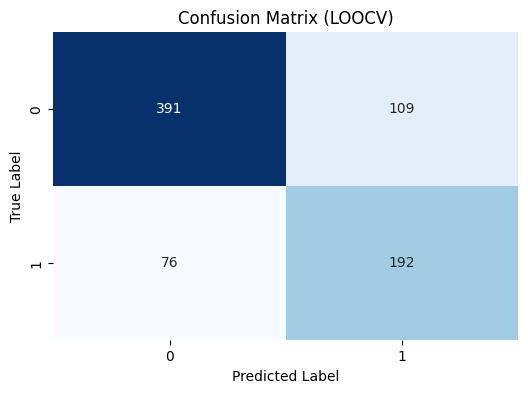

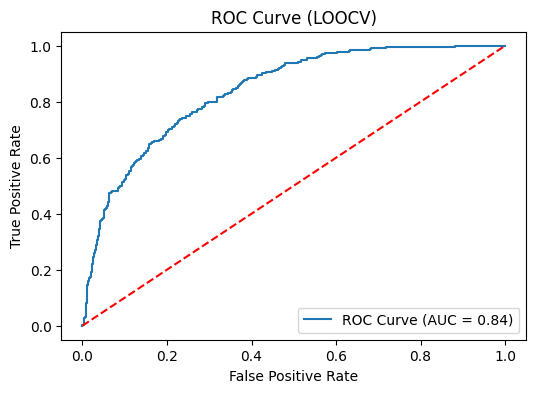

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import LeaveOneOut, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Base model
base_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# Initial RFE run to see selected features
rfe = RFE(base_model, n_features_to_select=6)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("নির্বাচিত ফিচার (RFE):", selected_features.tolist())

# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rfe", RFE(estimator=base_model)),
    ("logreg", base_model)
])

# Hyperparameter grid
param_grid = {
    "rfe__n_features_to_select": [5, 10, 15, 20],
    "logreg__C": [0.01, 0.1, 1, 10],
    "logreg__penalty": ["l1", "l2"]
}

# Leave-One-Out Cross Validation
loo = LeaveOneOut()

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",
    cv=loo,
    n_jobs=-1
)

# Train
grid_search.fit(X, y)

# Predictions with LOOCV
y_pred = cross_val_predict(grid_search.best_estimator_, X, y, cv=loo, n_jobs=-1)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy: {:.4f}".format(grid_search.best_score_))
print("\nClassification Report:\n", classification_report(y, y_pred))


# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (LOOCV)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = cross_val_predict(grid_search.best_estimator_, X, y, cv=loo, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (LOOCV)")
plt.legend(loc="lower right")
plt.show()


**9. XGBoost - Feature Selection (Filter Method),Data Partition (Hold-out Method)**

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
Test Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:40:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


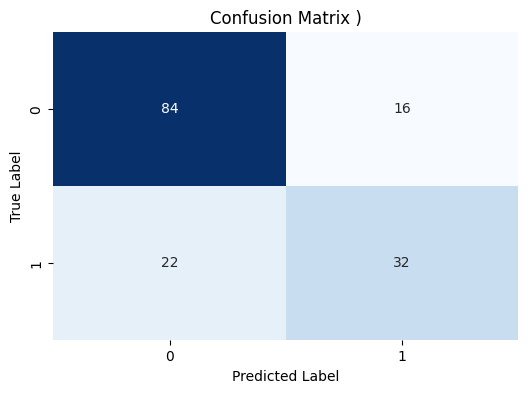

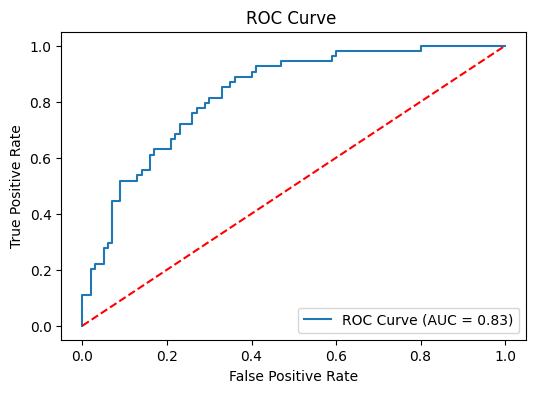

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 2. Data Partitioning (Hold-out method)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Pipeline (Filter Method + XGBoost)
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("selector", SelectKBest(score_func=chi2, k=6)),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# 4. Hyperparameter Grid
param_grid = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 4, 5],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}

# 5. Grid Search
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    scoring="accuracy",
                    cv=3,
                    n_jobs=-1,
                    verbose=1)

grid.fit(X_train, y_train)

# 6. Evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix )")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve ")
plt.legend(loc="lower right")
plt.show()


**10. XGBoost - Feature Selection (Filter Method),Data Partition (k-fold cross validation method )**

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:45:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
CV Accuracy: 0.7747304982599099

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       500
           1       0.71      0.60      0.65       268

    accuracy                           0.77       768
   macro avg       0.76      0.74      0.74       768
weighted avg       0.77      0.77      0.77       768



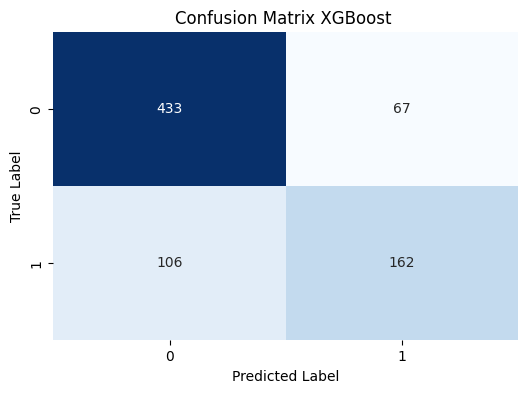

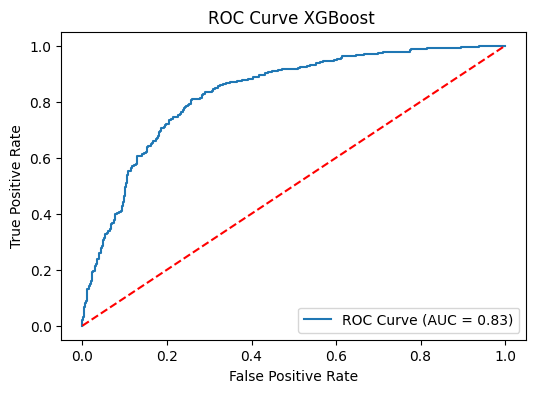

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Scaling (needed for chi2)
scaler = MinMaxScaler()

# Feature Selection (Filter method)
selector = SelectKBest(score_func=chi2, k="all")

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Pipeline
pipeline = Pipeline([
    ("scaler", scaler),
    ("selector", selector),
    ("xgb", xgb)
])

# Hyperparameter Grid
param_grid = {
    "xgb__n_estimators": [50, 100, 200],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.1, 0.2],
    "xgb__subsample": [0.8, 1.0]
}

# K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

# Train Model
grid.fit(X, y)

# Results
print("Best Parameters:", grid.best_params_)
print("CV Accuracy:", grid.best_score_)


# Predictions (Cross-Validation)

y_pred = cross_val_predict(grid.best_estimator_, X, y, cv=cv, n_jobs=-1)

# Classification Report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix XGBoost ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
y_pred_prob = cross_val_predict(grid.best_estimator_, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:,1]

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve XGBoost ")
plt.legend(loc="lower right")
plt.show()


**11. XGBoost - Feature Selection (Filter Method),Data Partition (stratified k-fold cross validation )**

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 150, 'classifier__subsample': 0.7}
Cross-Validated Accuracy (Train set): 0.7753

Test Set Accuracy: 0.7272727272727273

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



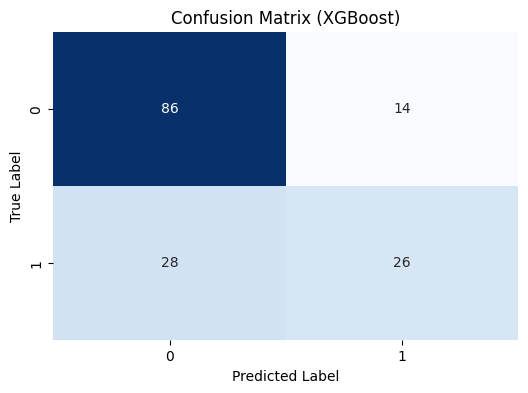

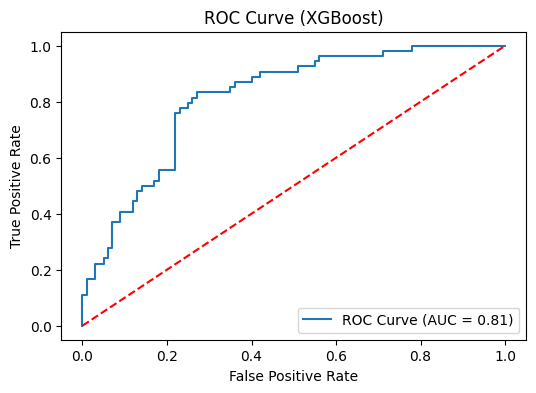

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pipeline তৈরি
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=chi2, k=10)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Hyperparameter Grid
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 1.0]
}

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

# মডেল প্রশিক্ষণ
grid_search.fit(X_train, y_train)

# Best Parameters & CV Accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Cross-Validated Accuracy (Train set): {:.4f}".format(grid_search.best_score_))

# Test Set Evaluation
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))


# Confusion Matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend(loc="lower right")
plt.show()


**12. XGBoost - Feature Selection (Filter Method),Data Partition (Leave one out cross validation )**

Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Training Accuracy: 0.8658854166666666
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       500
           1       0.81      0.80      0.81       268

    accuracy                           0.87       768
   macro avg       0.85      0.85      0.85       768
weighted avg       0.87      0.87      0.87       768



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:26:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


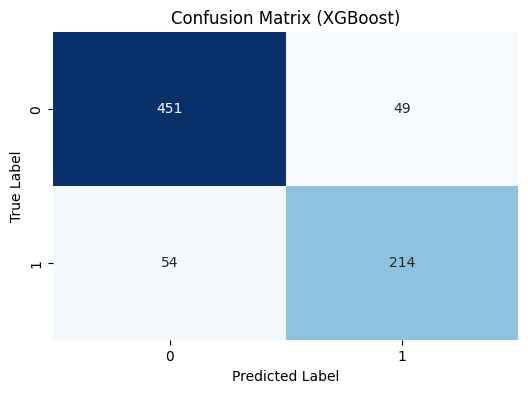

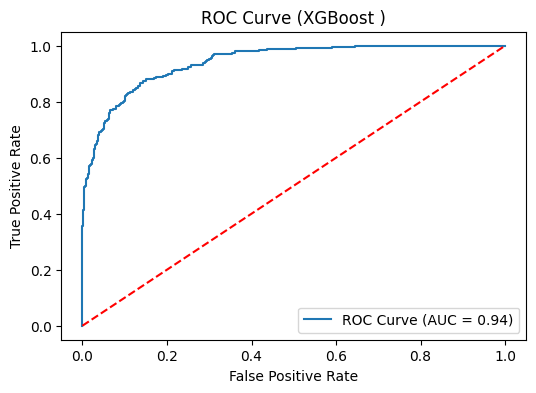

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection (Filter Method)
k = 5
feature_selector = SelectKBest(score_func=chi2, k=k)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

# Create Pipeline: Scaling -> Feature Selection -> Model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', feature_selector),
    ('classifier', xgb)
])

# Grid Search with LOOCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'classifier__n_estimators': param_grid['n_estimators'],
        'classifier__max_depth': param_grid['max_depth'],
        'classifier__learning_rate': param_grid['learning_rate'],
        'classifier__subsample': param_grid['subsample']
    },
    cv=loo,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the model
grid_search.fit(X, y)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X)

# Accuracy and Classification Report
train_accuracy = accuracy_score(y, y_pred)
print("Training Accuracy:", train_accuracy)
print("Classification Report:\n", classification_report(y, y_pred))


# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = grid_search.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost )")
plt.legend(loc="lower right")
plt.show()


**13. XGBoost - Feature Selection (Wrapper),Data Partition (Hold out Method )**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:30:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:30:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:30:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Selected Features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best CV Accuracy: 0.7752670173760561

Test Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:30:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


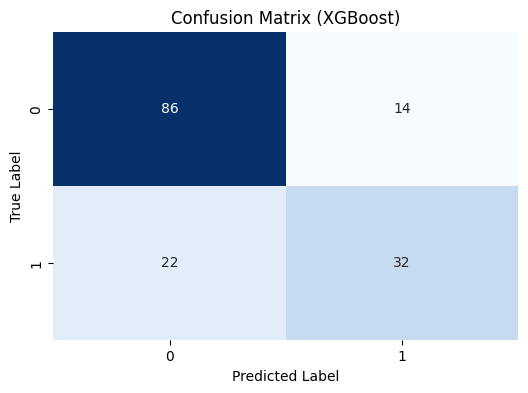

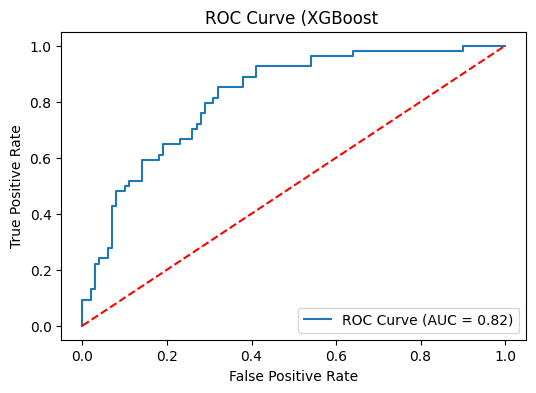

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("Outcome", axis=1)
y = df["Outcome"]


# 1. Wrapper Method (RFE)

base_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Recursive Feature Elimination
selector = RFE(estimator=base_model, n_features_to_select=6, step=1)
X_selected = selector.fit_transform(X, y)

print("Selected Features:", X.columns[selector.support_].tolist())


# 2. Hold-out Method

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Hyperparameter Tuning (Grid Search)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


# 4. Train with Best Model

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 5. Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 6. ROC Curve

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost ")
plt.legend(loc="lower right")
plt.show()


**14. XGBoost - Feature Selection (Wrapper),Data Partition (K-fold Cross Validation )**

নির্বাচিত ফিচার (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:35:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:35:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best CV Accuracy: 0.7670398507263763

Test Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



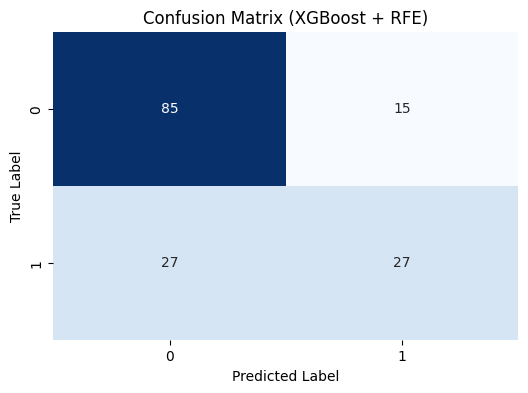

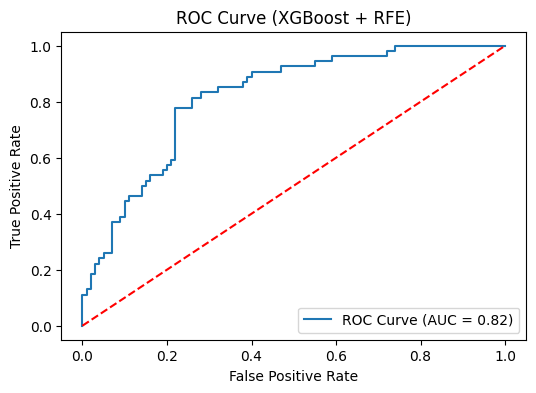

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

X = df.drop("Outcome", axis=1)
y = df["Outcome"]


# Data Split (Holdout for Final Test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model define (log_reg)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# RFE  feature
rfe = RFE(log_reg, n_features_to_select=6)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("নির্বাচিত ফিচার (RFE):", selected_features.tolist())

# Wrapper Method (RFE) + XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Recursive Feature Elimination
rfe = RFE(estimator=xgb, n_features_to_select=10)


# Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", rfe),
    ("classifier", xgb)
])


# Hyperparameter Grid

param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [3, 4, 5],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.8, 1.0],
}


# K-Fold Cross Validation

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Train with cross-validation
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


# Final Evaluation on Test Set

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost + RFE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost + RFE)")
plt.legend(loc="lower right")
plt.show()


**15. XGBoost - Feature Selection (Wrapper),Data Partition (Stratified K-fold Cross Validation )**

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:42:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:42:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:42:59] WARNING: /workspace

Accuracy : 0.77734375

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       500
           1       0.71      0.61      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



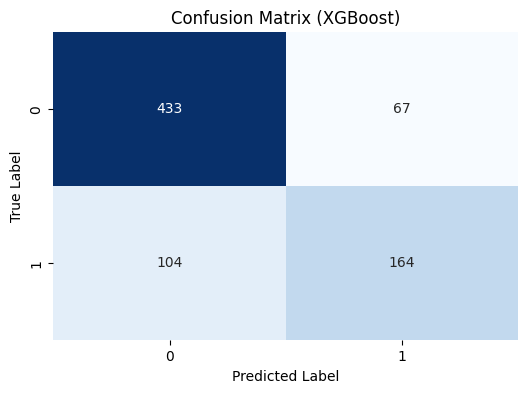

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:43:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:43:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:43:02] WARNING: /workspace

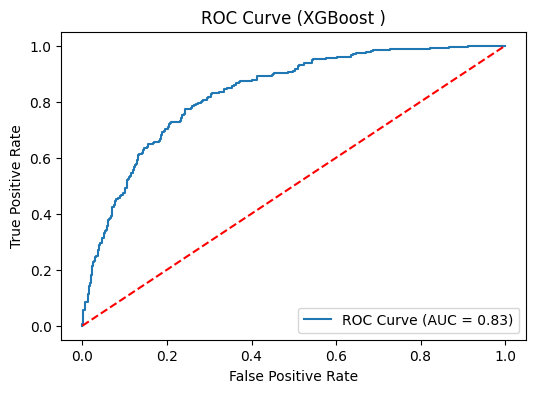

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Features & Target

X = df.drop("Outcome", axis=1)
y = df["Outcome"]


# Base XGBoost Model

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


# Wrapper Method (RFE)

selector = RFE(estimator=xgb, n_features_to_select=10, step=1)


# Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', selector),
    ('classifier', xgb)
])


# Hyperparameter Grid

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}


# Stratified K-Fold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# GridSearchCV

grid_search = GridSearchCV(
    pipe,
    param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

# Cross-Validated Predictions

y_pred_cv = cross_val_predict(grid_search.best_estimator_, X, y, cv=cv)

print("Accuracy :", accuracy_score(y, y_pred_cv))
print("\nClassification Report :\n", classification_report(y, y_pred_cv))

# Confusion Matrix

cm = confusion_matrix(y, y_pred_cv)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# ROC Curve

y_pred_prob = cross_val_predict(grid_search.best_estimator_, X, y, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost )")
plt.legend(loc="lower right")
plt.show()


**16. XGBoost - Feature Selection (Wrapper),Data Partition (Leave -One-Out-Cross-Validation )**

Fitting 768 folds for each of 54 candidates, totalling 41472 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:40:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:40:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:40:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:40:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:43:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:43:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:43:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:43:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/t

LOOCV Accuracy: 0.7734375

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       500
           1       0.70      0.62      0.65       268

    accuracy                           0.77       768
   macro avg       0.75      0.74      0.74       768
weighted avg       0.77      0.77      0.77       768



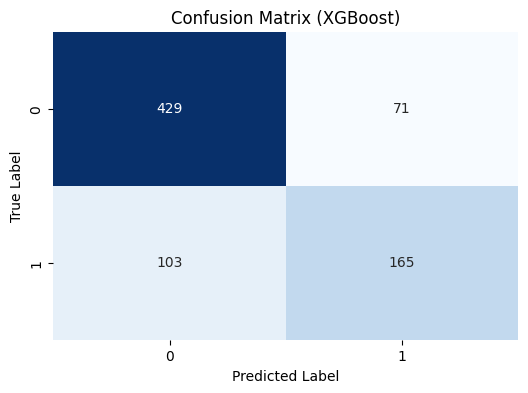

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/t

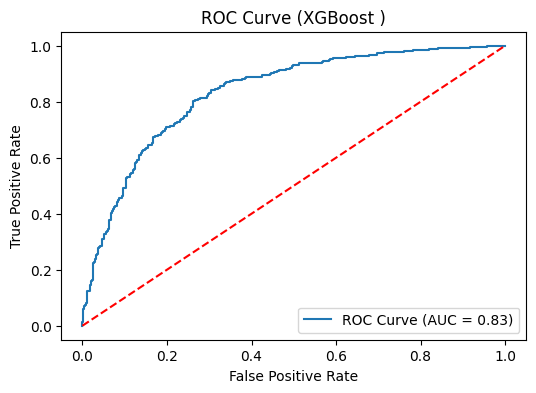

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import LeaveOneOut, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Features & Target

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Base Model

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


# Wrapper Method (RFE)

# Select top 6 features (you can change n_features_to_select)
rfe = RFE(estimator=xgb, n_features_to_select=6, step=1)


# Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', rfe),
    ('classifier', xgb)
])


# Hyperparameter Grid

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}


# Leave-One-Out Cross Validation

loo = LeaveOneOut()


# Grid Search

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=loo,
    n_jobs=-1,
    verbose=1
)


# Train Model

grid_search.fit(X, y)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)


# LOOCV Predictions

y_pred = cross_val_predict(grid_search.best_estimator_, X, y, cv=loo)

# Accuracy & Classification Report
print("LOOCV Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


# Confusion Matrix

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve

y_pred_prob = cross_val_predict(grid_search.best_estimator_, X, y, cv=loo, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost )")
plt.legend(loc="lower right")
plt.show()


**17  Random Forast - Feature Selection (Filter Method),Data Partition (Hold-out Method)**

Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



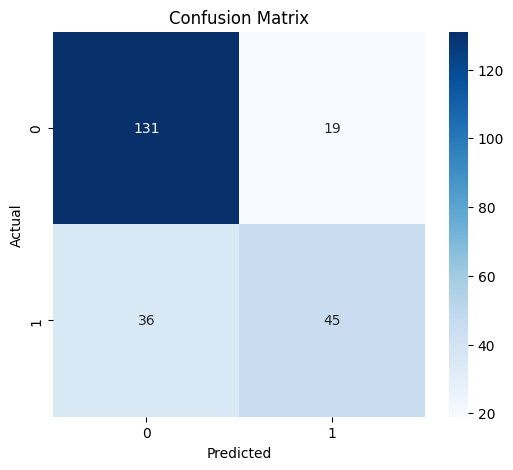

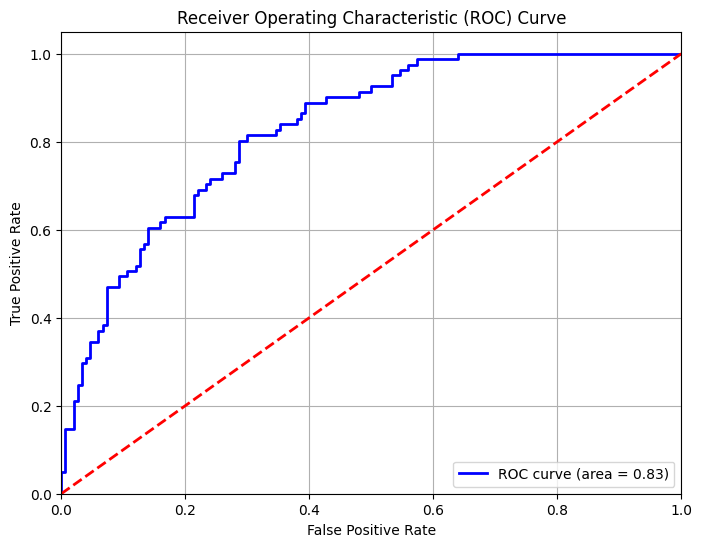

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc


# 3. Feature Selection (Filter Method)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply SelectKBest with ANOVA F-test
k = 5  # select top 5 features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


# 4. Data Partitioning (Hold-out Method)

X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=42, stratify=y
)


# 5. Feature Scaling (Optional)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 6. Hyperparameter Tuning (Grid Search) + Random Forest

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


# 7. Train and Test Model

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]  # probabilities for ROC


# 8. Evaluation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 9. Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# 10. ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**18  Random Forast - Feature Selection (Filter Method),Data Partition (k-fold cross validation method )**

Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Average Accuracy: 0.7707834649011119

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       500
           1       0.69      0.62      0.65       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



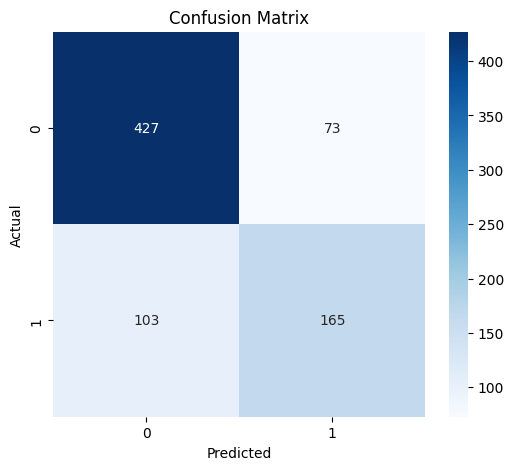

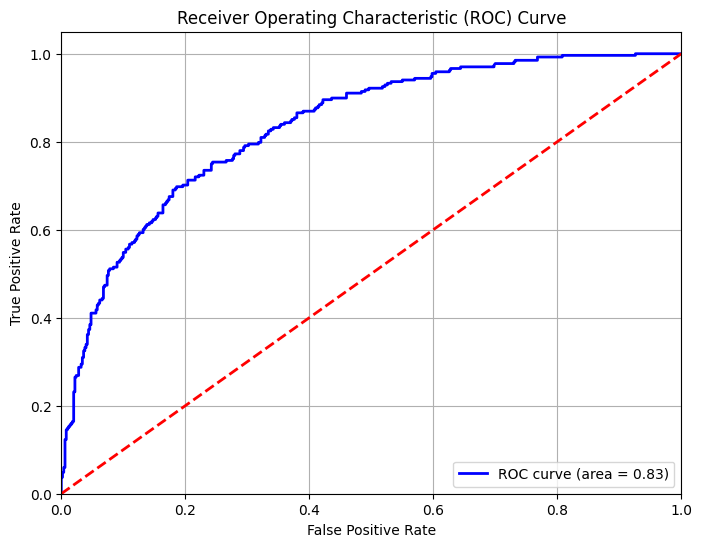

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc




# 3. Feature Selection (Filter Method)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Select top 5 features using ANOVA F-test
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


# 4. Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


# 5. Hyperparameter Tuning (Grid Search) + Random Forest

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best Parameters:", grid_search.best_params_)


# 6. K-Fold Cross Validation with Best Estimator

best_rf = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

y_true_all = []
y_pred_all = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)


# 7. Evaluation

accuracy = np.mean(accuracy_list)
precision = np.mean(precision_list)
recall = np.mean(recall_list)
f1 = np.mean(f1_list)
cm = confusion_matrix(y_true_all, y_pred_all)

print("Average Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))

# 8. Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



# 9. ROC Curve

# Get probability predictions for ROC
y_prob_all = []
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    best_rf.fit(X_train, y_train)
    y_prob_all.extend(best_rf.predict_proba(X_test)[:, 1])

fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**19.  Random Forast - Feature Selection (Filter Method),Data Partition (stratified k-fold cross validation method  )**

Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Average Accuracy: 0.7603344368050251

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       500
           1       0.68      0.60      0.63       268

    accuracy                           0.76       768
   macro avg       0.74      0.72      0.73       768
weighted avg       0.76      0.76      0.76       768



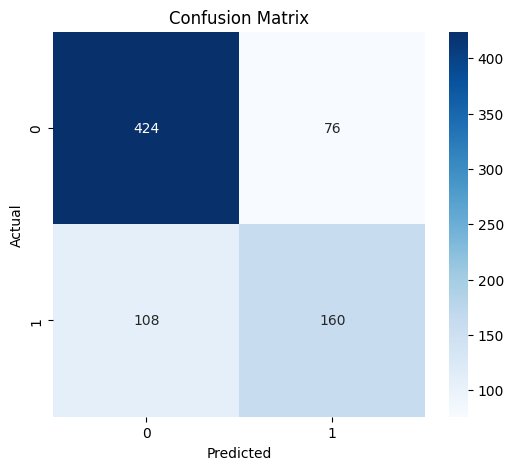

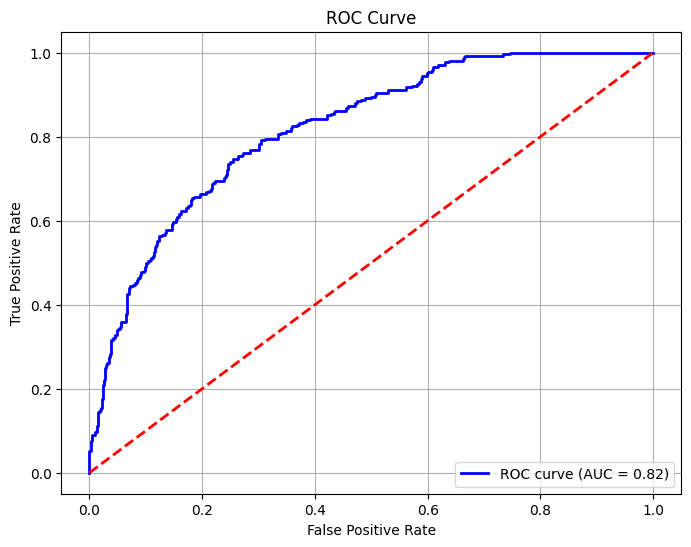

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc


X = df.drop('Outcome', axis=1)
y = df['Outcome']


# 3. Feature Selection (Filter Method)

k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


# 4. Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


# 5. Hyperparameter Tuning (Grid Search)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 6. Stratified K-Fold Cross Validation

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
y_true_all, y_pred_all, y_prob_all = [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    y_prob = best_rf.predict_proba(X_test)[:, 1]

    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred))
    metrics['recall'].append(recall_score(y_test, y_pred))
    metrics['f1'].append(f1_score(y_test, y_pred))

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_prob_all.extend(y_prob)


# 7. Average Metrics

print("Average Accuracy:", np.mean(metrics['accuracy']))
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))


# 8. Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 9. ROC Curve

fpr, tpr, _ = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**20.  Random Forast - Feature Selection (Filter Method),Data Partition (leave one out cross validation method )**

Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7682291666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       500
           1       0.70      0.58      0.64       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.73       768
weighted avg       0.76      0.77      0.76       768



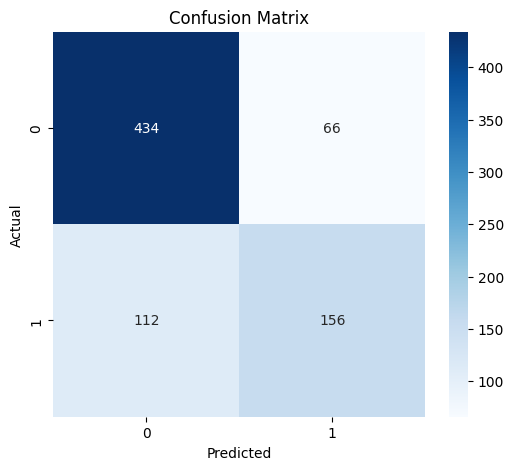

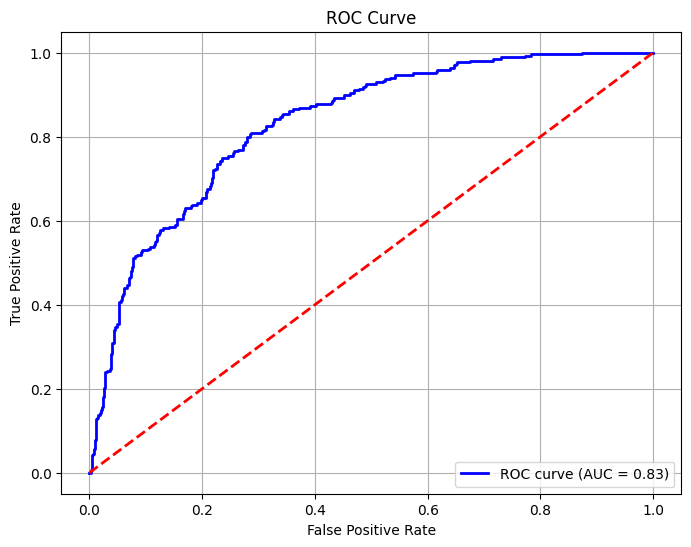

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# 2. Load Dataset


X = df.drop('Outcome', axis=1)
y = df['Outcome']


# 3. Feature Selection (Filter Method)

k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


# 4. Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


# 5. Hyperparameter Tuning (Grid Search)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


# 6. Leave-One-Out Cross Validation

loo = LeaveOneOut()

y_true_all = []
y_pred_all = []
y_prob_all = []

for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    y_prob = best_rf.predict_proba(X_test)[:,1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_prob_all.extend(y_prob)

# 7. Evaluation

accuracy = accuracy_score(y_true_all, y_pred_all)
precision = precision_score(y_true_all, y_pred_all)
recall = recall_score(y_true_all, y_pred_all)
f1 = f1_score(y_true_all, y_pred_all)
cm = confusion_matrix(y_true_all, y_pred_all)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))


# 8. Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 9. ROC Curve

fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**21. Random Forast - Feature Selection (wrapper Method) ,Data Partition (Hold-out Method)**

Selected Features (Wrapper Method - RFE): Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.7445887445887446

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



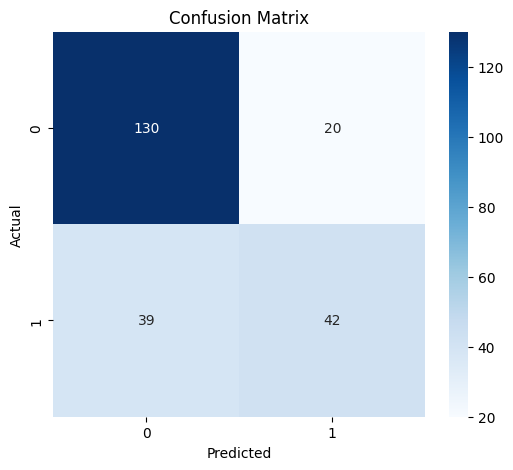

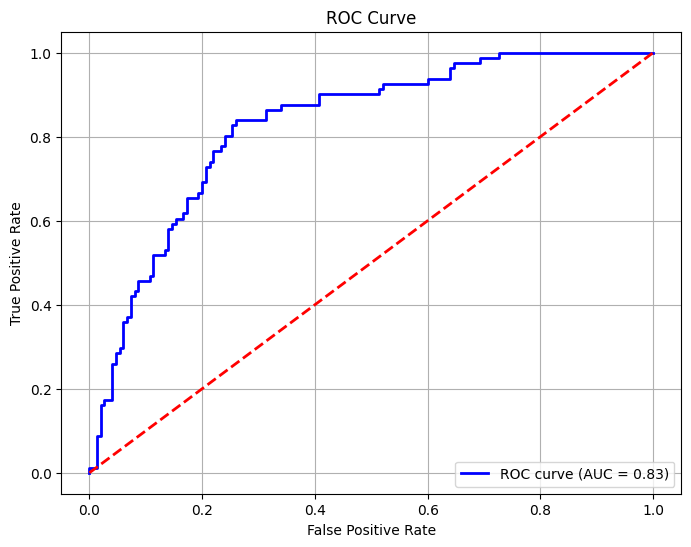

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

X = df.drop('Outcome', axis=1)
y = df['Outcome']


# 3. Feature Selection (Wrapper Method - RFE)

rf_estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator=rf_estimator, n_features_to_select=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features (Wrapper Method - RFE):", selected_features)


# 4. Data Partitioning (Hold-out Method)

X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=42, stratify=y
)


# 5. Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 6. Hyperparameter Tuning (Grid Search)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


# 7. Train and Test Model

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]


# 8. Evaluation
# ===========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 9. Confusion Matrix Heatmap
# ===========================
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ===========================
# 10. ROC Curve
# ===========================
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**22. Random Forast - Feature Selection (wrapper Method) ,Data Partition (k-fold cross validation method )**

Selected Features (Wrapper Method - RFE): Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7552083333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       500
           1       0.67      0.59      0.63       268

    accuracy                           0.76       768
   macro avg       0.73      0.72      0.72       768
weighted avg       0.75      0.76      0.75       768



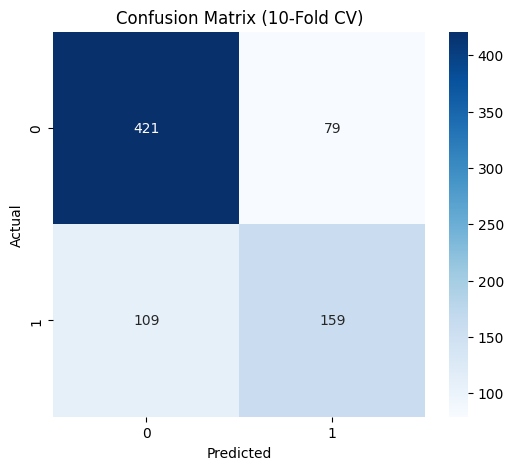

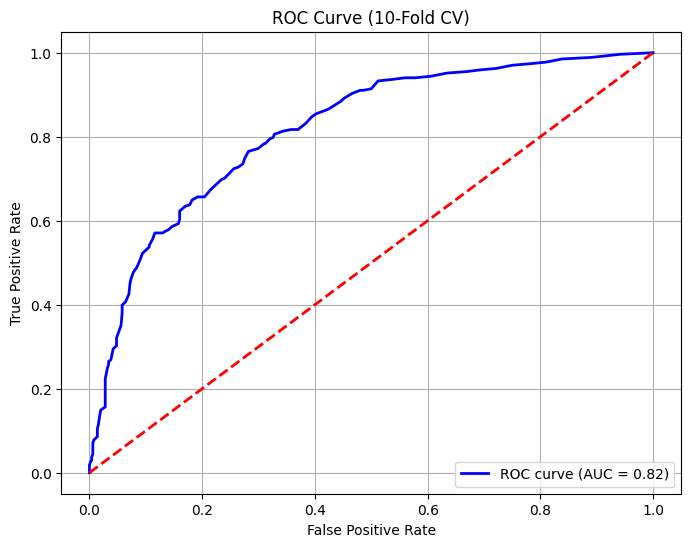

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

X = df.drop('Outcome', axis=1)
y = df['Outcome']


# 3. Feature Selection (Wrapper Method - RFE)

rf_estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator=rf_estimator, n_features_to_select=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features (Wrapper Method - RFE):", selected_features)


# 4. Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# 5. Hyperparameter Tuning (Grid Search + K-Fold CV)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

#  K-Fold Cross Validation Evaluation

kf = KFold(n_splits=10, shuffle=True, random_state=42)

y_pred_all = cross_val_predict(best_rf, X_scaled, y, cv=kf, method="predict")
y_prob_all = cross_val_predict(best_rf, X_scaled, y, cv=kf, method="predict_proba")[:,1]


# 7 Evaluation Metrics

accuracy = accuracy_score(y, y_pred_all)
precision = precision_score(y, y_pred_all)
recall = recall_score(y, y_pred_all)
f1 = f1_score(y, y_pred_all)
cm = confusion_matrix(y, y_pred_all)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y, y_pred_all))


# 8 Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (10-Fold CV)')
plt.show()


# 9. ROC Curve

fpr, tpr, thresholds = roc_curve(y, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**23. Random Forast - Feature Selection (wrapper Method) ,Data Partition (stratified k-fold cross validation method )**

Selected Features (Wrapper Method - RFE): Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7760416666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       500
           1       0.70      0.62      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



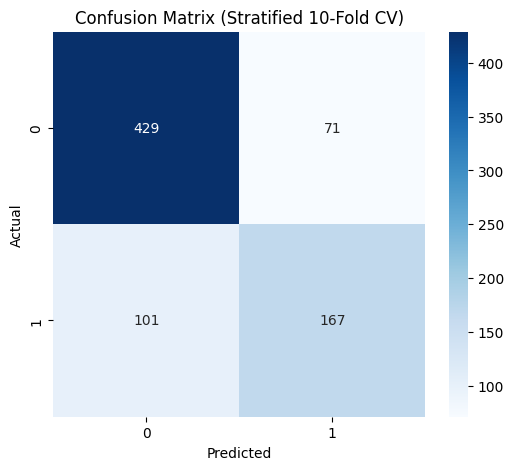

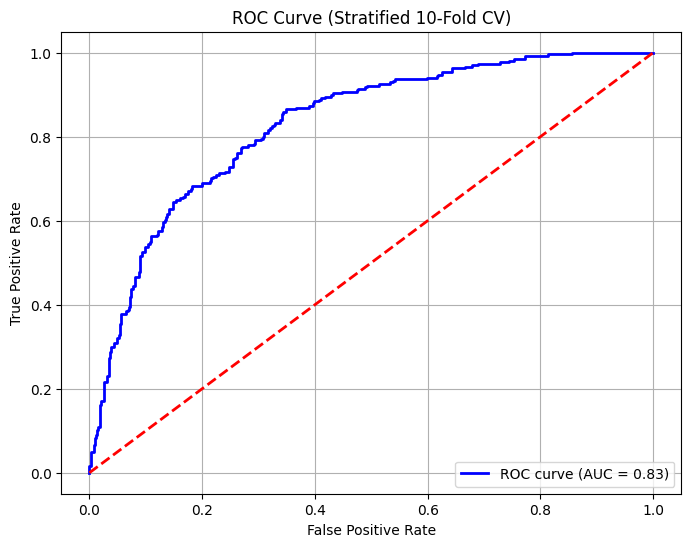

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)


X = df.drop('Outcome', axis=1)
y = df['Outcome']


#  Feature Selection (Wrapper Method - RFE)

rf_estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator=rf_estimator, n_features_to_select=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features (Wrapper Method - RFE):", selected_features)


# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


#  Hyperparameter Tuning (Grid Search + Stratified K-Fold CV)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_scaled, y)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


#  Stratified K-Fold Cross Validation Evaluation

y_pred_all = cross_val_predict(best_rf, X_scaled, y, cv=skf, method="predict")
y_prob_all = cross_val_predict(best_rf, X_scaled, y, cv=skf, method="predict_proba")[:,1]


# Evaluation Metrics

accuracy = accuracy_score(y, y_pred_all)
precision = precision_score(y, y_pred_all)
recall = recall_score(y, y_pred_all)
f1 = f1_score(y, y_pred_all)
cm = confusion_matrix(y, y_pred_all)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y, y_pred_all))


#  Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Stratified 10-Fold CV)')
plt.show()


# ROC Curve

fpr, tpr, thresholds = roc_curve(y, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Stratified 10-Fold CV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**24. Random Forast - Feature Selection (wrapper Method) ,Data Partition (leave one out cross validation method )**

Selected Features (Wrapper - RFE): ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy : 0.76171875

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       500
           1       0.67      0.62      0.64       268

    accuracy                           0.76       768
   macro avg       0.74      0.73      0.73       768
weighted avg       0.76      0.76      0.76       768



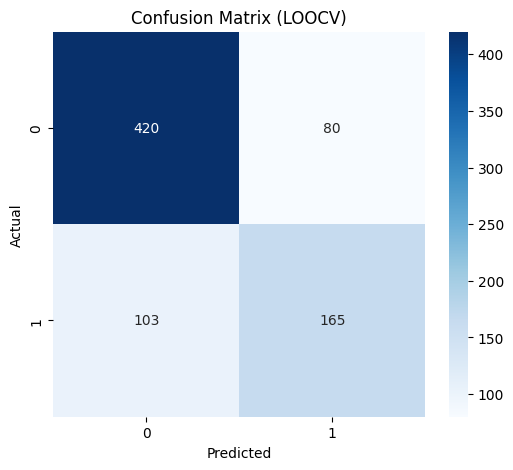

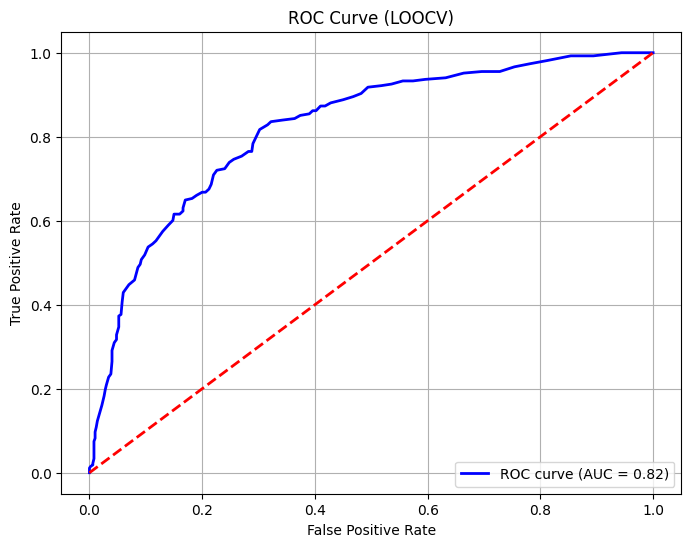

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

#  Feature Selection (Wrapper Method - RFE)

rf_estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator=rf_estimator, n_features_to_select=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features (Wrapper - RFE):", list(selected_features))


# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


#  Hyperparameter Tuning (Grid Search)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


# 6. Leave-One-Out Cross Validation

loo = LeaveOneOut()

y_true_all = []
y_pred_all = []
y_prob_all = []

for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    y_prob = best_rf.predict_proba(X_test)[:,1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_prob_all.extend(y_prob)


#  Evaluation Metrics

accuracy = accuracy_score(y_true_all, y_pred_all)
precision = precision_score(y_true_all, y_pred_all)
recall = recall_score(y_true_all, y_pred_all)
f1 = f1_score(y_true_all, y_pred_all)
cm = confusion_matrix(y_true_all, y_pred_all)


print("Accuracy :", accuracy)
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))


# Confusion Matrix Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LOOCV)')
plt.show()


#  ROC Curve

fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LOOCV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
